得到星表赤经赤纬

In [ ]:
from astropy.coordinates import SkyCoord
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
Pos = SkyCoord.from_name('VCC 2096')

POS = []
for i in tqdm(np.arange(1, 7841)):
    POS.append(SkyCoord.from_name('NGC ' + str(i)))

np.save("NGC_POS", POS)

Virgo_POS = []
for i in tqdm(np.arange(1, 2097)):
    Virgo_POS.append(SkyCoord.from_name('VCC ' + str(i)))

np.save("Virgo_POS", Virgo_POS)

画图

1d48m57.844s
182d05m05.037s


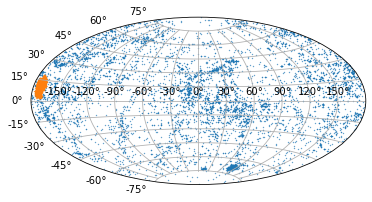

In [6]:
from matplotlib import pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np

data_ngc = np.load('NGC_POS.npy', allow_pickle=True)
data_virgo = np.load('Virgo_POS.npy', allow_pickle=True)
ra = []
dec = []
print(data_ngc[0].ra)
for i in np.arange(len(data_ngc)):
    ra.append(data_ngc[i].ra)
    dec.append(data_ngc[i].dec)
ngc = SkyCoord(ra, dec, frame='icrs', unit=u.deg)

ra_v = []
dec_v = []
print(data_virgo[0].ra)
for i in np.arange(len(data_virgo)):
    ra_v.append(data_virgo[i].ra)
    dec_v.append(data_virgo[i].dec)
virgo = SkyCoord(ra_v, dec_v, frame='icrs', unit=u.deg)
# ax = plt.axes(projection='geo aitoff')

plt.subplot(111, projection='aitoff')
# ax.grid(True)
plt.grid(True)
# ax.plot(
#     30, 10,
#     transform=ax.get_transform('world'))

# ax.scatter(gal.l.wrap_at('180d').radian, gal.b.radian)
plt.scatter(ngc.ra.wrap_at('180d').radian, ngc.dec.radian, s=0.1)
plt.scatter(virgo.ra.wrap_at('180d').radian, virgo.dec.radian, s=0.1)
# ax.scatter(10, 30, gal.b.radian)

# ax.figure.savefig("111")
plt.savefig("ICRS")

并不各向同性。

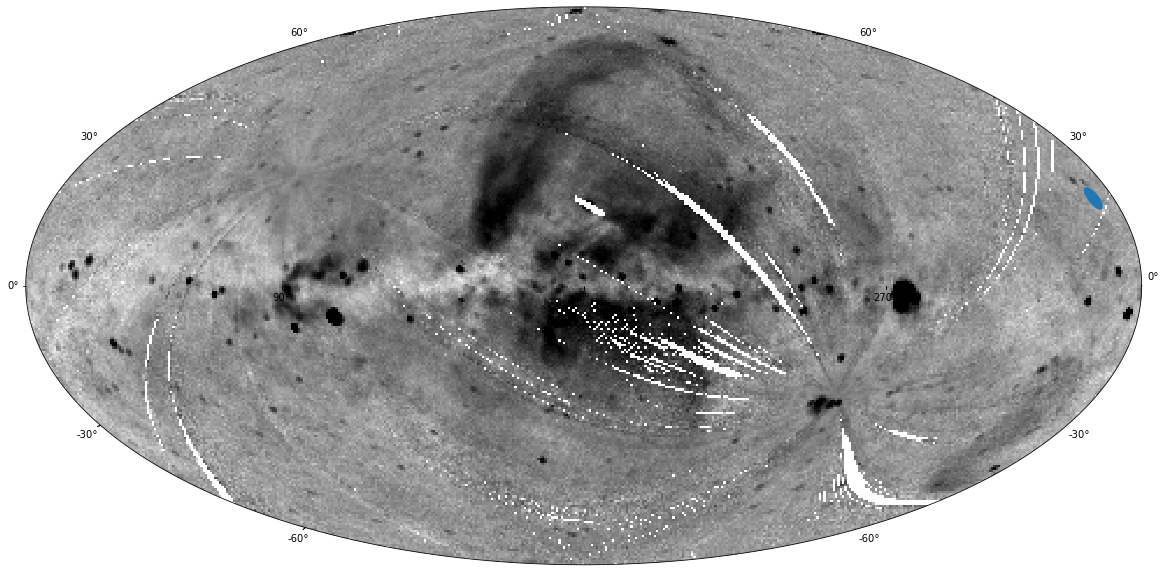

In [7]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle
from astropy.visualization.wcsaxes.frame import EllipticalFrame
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.visualization import simple_norm


filename = get_pkg_data_filename('allsky/allsky_rosat.fits')
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
data = hdu.data

target = SkyCoord(110 * u.deg, 30 * u.deg, frame='icrs')
plt.figure(figsize=(20, 15))
ax = plt.subplot(projection=wcs, frame_class=EllipticalFrame)
im = ax.imshow(data, origin='lower', cmap='gray_r', interpolation='none',
               norm=simple_norm(data, stretch='asinh', max_percent=99.5, min_percent=1))
circle = SphericalCircle((target.ra, target.dec),
                         radius=2.5*u.deg,
                         transform=ax.get_transform('icrs'))
ax.add_patch(circle)
plt.show()

### 自己实现的方法参见 http://cluster.shao.ac.cn/~shen/wiki/index.php?title=%E5%A4%A9%E5%9B%BE%E6%8A%95%E5%BD%B1%E4%B8%8A%E7%9A%84%E5%9C%86

第一题

$m_{MW}-m_{sun} = -2.5lg(\frac{L_{MW}}{L_{sun}})$

得$m_{MW} = 4.8 - 27.5 = -22.7mag$

第二题

$\theta = arctan \frac{r}{D} = 0.05rad = 2.86\degree = 2.86*(180/\pi)*3600 = 10292.61''$

第三题

$L= m + 2.5lg(\pi r^2) = -1.39magarcsec^{-2}$

第四题

不变

### 星系的表面亮度的范围在15-25magarcsec^2之间，从结果就应该知道错了~
### 错在绝对星等是10pc距离上的视星等，问题是放在100kpc上